# Principal Component Analysis with SVD

The SVD is charcterised by this equation, where X is a matrix, then B would be the mean-centered matrix of X.
$$ B = U \Sigma V^T $$

In this notebook we will calculate the Principal Components of the data using SVD, given the following equation:

$$T = U \Sigma $$

Where T is a matrix of the Prinicpal Components, therfore we can get the Principal Components from the following:
$$ B = U \Sigma V^T $$

We project our matrix B to the eigenbasis given by V
$$ BV = U \Sigma V^T V $$
$$ T = BV $$
$$ T = U \Sigma $$

We will compare the Principal Components found through SVD with those in sklearn's decomposition library.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Data: Breast Cancer
We will conduct a PCA on the breast cancer dataset in order to visualise the difference between Malignant Tumors and Benign Tumors

In [3]:
data = pd.read_csv('data/breast-cancer-wiscon.csv')
data_array = data.to_numpy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.diagnosis = data.diagnosis.astype('category')
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X = data.drop(['diagnosis', 'id'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y = data.diagnosis

### Calculating the Mean Centered Data

In [61]:
B = X - X.mean()

radius_mean                 14.127292
texture_mean                19.289649
perimeter_mean              91.969033
area_mean                  654.889104
smoothness_mean              0.096360
compactness_mean             0.104341
concavity_mean               0.088799
concave points_mean          0.048919
symmetry_mean                0.181162
fractal_dimension_mean       0.062798
radius_se                    0.405172
texture_se                   1.216853
perimeter_se                 2.866059
area_se                     40.337079
smoothness_se                0.007041
compactness_se               0.025478
concavity_se                 0.031894
concave points_se            0.011796
symmetry_se                  0.020542
fractal_dimension_se         0.003795
radius_worst                16.269190
texture_worst               25.677223
perimeter_worst            107.261213
area_worst                 880.583128
smoothness_worst             0.132369
compactness_worst            0.254265
concavity_wo

In [63]:
round(B.mean())

radius_mean               -0.0
texture_mean              -0.0
perimeter_mean            -0.0
area_mean                 -0.0
smoothness_mean            0.0
compactness_mean          -0.0
concavity_mean            -0.0
concave points_mean        0.0
symmetry_mean             -0.0
fractal_dimension_mean    -0.0
radius_se                 -0.0
texture_se                -0.0
perimeter_se               0.0
area_se                   -0.0
smoothness_se             -0.0
compactness_se            -0.0
concavity_se               0.0
concave points_se         -0.0
symmetry_se               -0.0
fractal_dimension_se      -0.0
radius_worst              -0.0
texture_worst              0.0
perimeter_worst           -0.0
area_worst                 0.0
smoothness_worst          -0.0
compactness_worst         -0.0
concavity_worst            0.0
concave points_worst      -0.0
symmetry_worst            -0.0
fractal_dimension_worst    0.0
dtype: float64

### Calculating the SVD

Text(0.5, 1.0, 'Cumulative Graph')

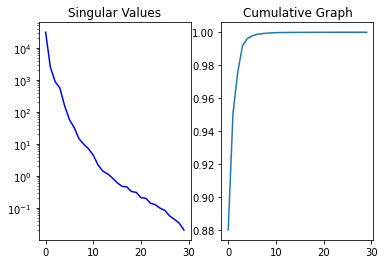

In [64]:
B_arr = B.to_numpy()
U, S, VT = np.linalg.svd(X_arr, full_matrices=0)

#Visualising the singular values
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S, color='b')
ax1.set_title('Singular Values')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S))
ax2.set_title('Cumulative Graph')

We observe through cumulative graph that the first few (~5) singular values capture most of the data

### Calculating the Principal Components

In [81]:
pd.DataFrame({'Singular Values': S}).head()

,Singular Values
0,30786.444628
1,2480.445783
2,880.462945
3,555.123288
4,153.142190


In [93]:
display((X_arr.shape, V.shape))

pca = U @ np.diag(S)

((569, 30), (30, 30))

AttributeError: 'Text' object has no property 'ax'

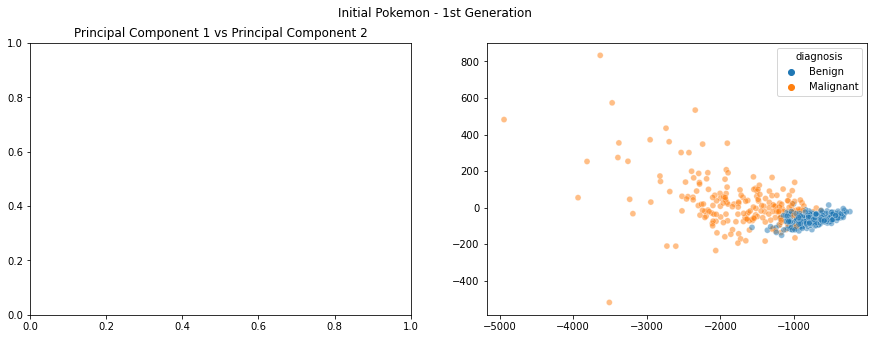

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Initial Pokemon - 1st Generation')

sns.scatterplot(x=pca.T[0], y=pca.T[1], hue=y.map({'M':'Malignant', 'B':'Benign'}), alpha=0.5)
axes[0].set_title('Principal Component 1 vs Principal Component 2', ax=axes[0])
     
sns.scatterplot(x=pca.T[1], y=pca.T[2], hue=y.map({'M':'Malignant', 'B':'Benign'}), alpha=0.5)
axes[1].set_title('Principal Component 2 vs Principal Component 3', ax=axes[1])

As we can see there seems to be a seperation between the cases where the tumor is malginant versus benign, if we used more principal components it is possible that the seperation becomes more apparent.

PCA allowed us to visualise higher dimensional data in 2 dimensions making it easier for us to determine the differences between the types of cancers

### Comparison with sklearn's PCA

In [34]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA()
X_pca_sklearn = pca.fit_transform(X.to_numpy())

In [56]:
X_pca_sklearn.shape, X.to_numpy().shape

((569, 30), (569, 30))

<AxesSubplot:>

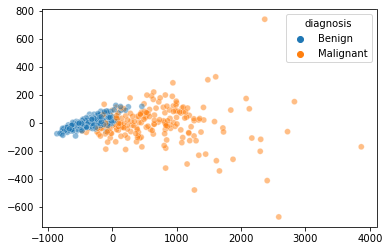

In [86]:
sns.scatterplot(x=X_pca_sklearn.T[0], y=X_pca_sklearn.T[1], hue=y.map({'M':'Malignant', 'B':'Benign'}), alpha=0.5)

We can observe a similar seperation using sklearn's PCA algorithm.